### New Features Derivation and Feature Enconding
https://monkeylearn.com/blog/data-preprocessing/

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
#Visualization
import plotly.express as px
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.subplots as sp
import plotly.graph_objs as go
# !pip install -U scikit-learn
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('df_withoutOutliers.csv')
df.shape

(18260, 27)

### New Features Derivation

https://www.billboard.com/charts/year-end/2022/hot-100-artists/

#### Calculate new features from the original features set

In [3]:
with open('top100_artists_2022.txt') as f:
    lines = f.readlines()

top_artists=[line.strip().lower() for line in lines]
top_artists[:5]

['bad bunny', 'doja cat', 'harry styles', 'ed sheeran', 'morgan wallen']

In [4]:
top_artists_no_speC=[''.join(a for a in artist if a.isalnum()) for artist in top_artists]
ifTop100=[1 if ''.join(a for a in artist.lower() if a.isalnum()) in top_artists_no_speC else 0 for artist in list(df['Artist'])]
np.array(ifTop100).sum()

758

In [5]:
df['ifTop100']=ifTop100
df[df['ifTop100']==1]['Artist'].unique()

array(['Sia', 'Elton John', '21 Savage', 'Chris Brown', 'Mariah Carey',
       'Brenda Lee', 'Andy Williams', 'Burl Ives', 'Kate Bush',
       'Jelly Roll', 'Bobby Helms', 'DJ Khaled', 'Megan Thee Stallion',
       'Gunna', 'Carrie Underwood', 'Miranda Lambert', 'Young Thug',
       'Wizkid', 'Maren Morris', 'Jason Aldean', 'Ed Sheeran',
       'Taylor Swift', 'Future', 'Luke Bryan', 'Eric Church',
       'OneRepublic', 'Chris Stapleton', 'Adele', 'Drake', 'Nicki Minaj',
       'Ariana Grande', 'Imagine Dragons', 'Bruno Mars', 'Steve Lacy',
       'Justin Bieber', 'Chencho Corleone', 'Cody Johnson',
       'Kendrick Lamar', 'Charlie Puth', 'The Weeknd', 'Anderson .Paak',
       'Stephanie Beatriz', 'KAROL G', 'Lil Durk', 'Glass Animals',
       'Thomas Rhett', 'Nardo Wick', 'Jon Pardi', 'Lizzo', 'Dove Cameron',
       'Latto', 'Sam Hunt', 'Doja Cat', 'SZA', 'Morgan Wallen',
       'Luke Combs', 'Kodak Black', 'Kane Brown', 'Post Malone',
       'Dua Lipa', 'Bad Bunny', 'Rauw Alejandro'

Creating new features trackLength, albumLength and ArtistEqualsChannel

In [6]:
trackLength=[len(track) for track in df['Track'].values]
albumLength=[len(album) for album in df['Album'].values]
df['trackLength']=trackLength
df['albumLength']=albumLength

In [8]:
indexs=df[df['Artist'].str.strip().str.lower()==df['Channel'].str.strip().str.lower()].index
df['ArtistEqualsChannel']=0
df['ArtistEqualsChannel'][indexs]=1

In [9]:
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,ifTop100,trackLength,albumLength,ArtistEqualsChannel
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.0,1.0,1.040235e+09,0,14,10,1
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1.0,1.0,3.100837e+08,0,15,13,1
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1.0,1.0,6.306347e+07,0,45,45,1
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1.0,1.0,4.346636e+08,0,18,13,1
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1.0,1.0,6.172597e+08,0,14,8,1


#### Extract variables from Spotify API

In [10]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import time

Connexion with Spotity API

In [11]:
#Authentication - without user
cid="none"
secret="none"
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [12]:
total_tracks=[]
release_date=[]
available_markets=[]
dic_tracks={}

The code below was used to make API petitions in order to get track information. 

In [247]:
# uris=list(df['Uri'][:19950])
# maxUris=50
# for i in range(0,len(uris),maxUris):
#     print(i)
#     ids=uris[i:i+maxUris]
#     tracks=sp.tracks(ids)
#     for track in tracks['tracks']:
#         dic_tracks[track['uri']]=track
#     time.sleep(20)

# uris=list(df['Uri'][19950:])
# len(uris)
# tracks=sp.tracks(uris)
# for track in tracks['tracks']:
#     dic_tracks[track['uri']]=track

In [248]:
# import json
  
# with open('dataFromSpotify.txt', 'w') as convert_file:
#      convert_file.write(json.dumps(dic_tracks))

Load from a file that contains tracks information retrieved before

In [1]:
import json
with open('dataFromSpotify.txt') as f:
    json_data = json.load(f)

Spotify function response

In [7]:
json_data['spotify:track:0d28khcov6AiegSCpG5TuT']

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3AA28KZvwAUcZuOKwyblJQ'},
    'href': 'https://api.spotify.com/v1/artists/3AA28KZvwAUcZuOKwyblJQ',
    'id': '3AA28KZvwAUcZuOKwyblJQ',
    'name': 'Gorillaz',
    'type': 'artist',
    'uri': 'spotify:artist:3AA28KZvwAUcZuOKwyblJQ'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'ET',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'HK',
   'HN',
   'HR',
   'HT',
   'HU',
   'ID',
   

In [14]:
uris=list(json_data.keys())
indexsUri=[uris.index(uri) for uri in list(df['Uri']) if uri in uris]

In [15]:
uris_not=[uri for uri in list(df['Uri']) if uri not in uris]

In [17]:
spotify_data=np.array(list(json_data.items()))[indexsUri]

In [18]:
for track in spotify_data:
    total_tracks.append(track[1]['album']['total_tracks'])
    available_markets.append(len(track[1]['album']['available_markets']))
    release_date.append(track[1]['album']['release_date'])


Adding the new features to the dataset

In [19]:
df['album_tracks']=total_tracks
df['available_markets']=available_markets
df['album_release_date']=release_date

In [20]:
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,ifTop100,trackLength,albumLength,ArtistEqualsChannel,album_tracks,available_markets,album_release_date
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.0,1.0,1.040235e+09,0,14,10,1,15,168,2005-05-23
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1.0,1.0,3.100837e+08,0,15,13,1,16,184,2010-03-03
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1.0,1.0,6.306347e+07,0,45,45,1,1,180,2022-08-31
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1.0,1.0,4.346636e+08,0,18,13,1,16,184,2010-03-03
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1.0,1.0,6.172597e+08,0,14,8,1,18,2,2001


In [21]:
df['album_release_date'] = pd.to_datetime(df["album_release_date"], format='%Y-%m-%d', errors='coerce')

In [22]:
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,ifTop100,trackLength,albumLength,ArtistEqualsChannel,album_tracks,available_markets,album_release_date
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.0,1.0,1.040235e+09,0,14,10,1,15,168,2005-05-23
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1.0,1.0,3.100837e+08,0,15,13,1,16,184,2010-03-03
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1.0,1.0,6.306347e+07,0,45,45,1,1,180,2022-08-31
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1.0,1.0,4.346636e+08,0,18,13,1,16,184,2010-03-03
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1.0,1.0,6.172597e+08,0,14,8,1,18,2,2001-01-01


In [23]:
# delete release_date empty rows
df = df.dropna(subset=['album_release_date'])

In [24]:
df[df['album_release_date'].isnull()]

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,ifTop100,trackLength,albumLength,ArtistEqualsChannel,album_tracks,available_markets,album_release_date


In [25]:
has_nat = df['album_release_date'].isnull().any()

if has_nat:
    print("The 'album_release_date' has NaT values.")
else:
    print("The 'album_release_date' does not have NaT values.")

The 'album_release_date' does not have NaT values.


In [26]:
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,ifTop100,trackLength,albumLength,ArtistEqualsChannel,album_tracks,available_markets,album_release_date
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.0,1.0,1.040235e+09,0,14,10,1,15,168,2005-05-23
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1.0,1.0,3.100837e+08,0,15,13,1,16,184,2010-03-03
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1.0,1.0,6.306347e+07,0,45,45,1,1,180,2022-08-31
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1.0,1.0,4.346636e+08,0,18,13,1,16,184,2010-03-03
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1.0,1.0,6.172597e+08,0,14,8,1,18,2,2001-01-01


In [27]:
specific_date = pd.to_datetime('01-04-2023', format='%d-%m-%Y') 
df['album_release_days'] = (specific_date-df['album_release_date']).dt.days

In [28]:
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,ifTop100,trackLength,albumLength,ArtistEqualsChannel,album_tracks,available_markets,album_release_date,album_release_days
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.0,1.0,1.040235e+09,0,14,10,1,15,168,2005-05-23,6522
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1.0,1.0,3.100837e+08,0,15,13,1,16,184,2010-03-03,4777
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1.0,1.0,6.306347e+07,0,45,45,1,1,180,2022-08-31,213
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1.0,1.0,4.346636e+08,0,18,13,1,16,184,2010-03-03,4777
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1.0,1.0,6.172597e+08,0,14,8,1,18,2,2001-01-01,8125


In [29]:
df[df['album_release_days']==38390]

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,ifTop100,trackLength,albumLength,ArtistEqualsChannel,album_tracks,available_markets,album_release_date,album_release_days
4393,kevoxx,https://open.spotify.com/artist/5xmZKWPhiMa6sD...,Love - Remix,Love - Remix,single,spotify:track:5f5C2gkvXy16MbQwEYZeYS,0.59,0.554,9.0,-11.377,0.0425,0.0172,0.0,0.239,0.411,135.265,182962.0,https://www.youtube.com/watch?v=xr1l7dIU3PA,International Love (Remix),Xanemusic - Topic,37803.0,639.0,0.0,Provided to YouTube by Farolatino S.A.\n\nInte...,1.0,1.0,8512699.0,0,12,12,0,2,0,1918-02-21,38390


In [30]:
df=df.drop(4393)

In [32]:
df[df['album_release_days']==32962]

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,ifTop100,trackLength,albumLength,ArtistEqualsChannel,album_tracks,available_markets,album_release_date,album_release_days
5158,Billie Holiday,https://open.spotify.com/artist/1YzCsTRb22dQkh...,All of Me,Lady Day: The Complete Billie Holiday On Colum...,compilation,spotify:track:1LGqJ3nvxpVXDWpEzq4DJD,0.504,0.0644,2.0,-14.754,0.0408,0.972,0.000004,0.174,0.403,106.994,181440.0,https://www.youtube.com/watch?v=lI5ORDi7yOs,Billie Holiday- All of Me,Lady0046,1854555.0,24472.0,555.0,No Copyright Intended.,0.0,0.0,76055672.0,0,9,61,0,230,184,1933-01-01,32962


In [34]:
df['album_release_days'].min()

61

In [35]:
df[df['album_release_days']<1000]

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,ifTop100,trackLength,albumLength,ArtistEqualsChannel,album_tracks,available_markets,album_release_date,album_release_days
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1.0,1.0,63063467.0,0,45,45,1,1,180,2022-08-31,213
6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.716,0.897,4.0,-7.185,0.0629,0.012000,0.262000,0.3250,0.3580,127.030,274142.0,https://www.youtube.com/watch?v=BONNm0F7Tto,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,451996.0,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",0.0,1.0,10666154.0,0,63,63,0,2,183,2022-11-18,134
8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.741,0.913,2.0,-3.340,0.0465,0.003430,0.103000,0.3250,0.6430,120.012,213750.0,https://www.youtube.com/watch?v=S03T47hapAc,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,24459820.0,739527.0,20296.0,Listen to Cracker Island: https://gorillaz.lnk...,1.0,1.0,42671901.0,0,33,33,1,1,180,2022-06-22,283
27,50 Cent,https://open.spotify.com/artist/3q7HBObVc0L8jN...,Is This Love ('09) (feat. 50 Cent),Curtain Call 2,album,spotify:track:7rK0iM6jwuo1oizdx8suQA,0.853,0.776,8.0,-4.221,0.2610,0.071400,0.000000,0.1810,0.6590,94.028,212013.0,https://www.youtube.com/watch?v=Zl64MRAqQxk,"Eminem, 50 Cent - Is This Love ('09) [Visualizer]",EminemVEVO,5289821.0,245935.0,9008.0,"Listen to ""Curtain Call 2"": \nhttps://Eminem.l...",1.0,1.0,28529840.0,0,34,14,0,35,183,2022-08-05,239
31,Metallica,https://open.spotify.com/artist/2ye2Wgw4gimLv2...,Lux Æterna,Lux Æterna,single,spotify:track:3pwmJJRlr8nXNN9PFD18np,0.386,0.996,11.0,-2.960,0.0754,0.000012,0.000836,0.1160,0.1880,130.573,205680.0,https://www.youtube.com/watch?v=_u-7rWKnVVo,Metallica: Lux Æterna (Official Music Video),Metallica,14937918.0,473751.0,46230.0,Metallica's official music video for “Lux Æter...,1.0,1.0,20061385.0,0,10,10,1,1,2,2022-11-28,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18255,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,1.0,1.0,9227144.0,0,20,20,0,1,184,2022-07-12,263
18256,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,1.0,1.0,10898176.0,0,30,30,0,1,184,2022-07-11,264
18257,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.

In [36]:
df[df['album_release_days']==df['album_release_days'].min()]

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,ifTop100,trackLength,albumLength,ArtistEqualsChannel,album_tracks,available_markets,album_release_date,album_release_days
4386,kevoxx,https://open.spotify.com/artist/5xmZKWPhiMa6sD...,Untouchable (No) Sped Up - Remix,TikTok Viral Songs 2023 (Remix),album,spotify:track:3qDT4IFSrCBoyviIB9pwea,0.752,0.818,4.0,-4.676,0.195,0.0169,0.00002,0.641,0.756,114.338,173382.0,https://www.youtube.com/watch?v=Hya5zrWG2k0,Untouchable (No) Sped Up,Xanemusic - Topic,166617.0,3434.0,0.0,Provided to YouTube by Farolatino S.A.\n\nUnto...,1.0,1.0,8063571.0,0,32,31,0,7,0,2023-01-30,61
4389,kevoxx,https://open.spotify.com/artist/5xmZKWPhiMa6sD...,Ride It (sped up + reverb) - Remix,TikTok Viral Songs 2023 (Remix),album,spotify:track:7vRMQXQnazO91SpBtJEntC,0.580,0.703,2.0,-7.614,0.154,0.3810,0.00000,0.242,0.695,56.599,156497.0,https://www.youtube.com/watch?v=ZgZRXXpdoLM,Ride It (sped up + reverb),Various Artists - Topic,468650.0,10625.0,0.0,Provided to YouTube by Farolatino S.A.\n\nRide...,1.0,1.0,4302618.0,0,34,31,0,7,0,2023-01-30,61


In [37]:
df[df['Artist']=='kevoxx']

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,ifTop100,trackLength,albumLength,ArtistEqualsChannel,album_tracks,available_markets,album_release_date,album_release_days
4386,kevoxx,https://open.spotify.com/artist/5xmZKWPhiMa6sD...,Untouchable (No) Sped Up - Remix,TikTok Viral Songs 2023 (Remix),album,spotify:track:3qDT4IFSrCBoyviIB9pwea,0.752,0.818,4.0,-4.676,0.1950,0.01690,0.000020,0.6410,0.756,114.338,173382.0,https://www.youtube.com/watch?v=Hya5zrWG2k0,Untouchable (No) Sped Up,Xanemusic - Topic,166617.0,3434.0,0.0,Provided to YouTube by Farolatino S.A.\n\nUnto...,1.0,1.0,8063571.0,0,32,31,0,7,0,2023-01-30,61
4387,kevoxx,https://open.spotify.com/artist/5xmZKWPhiMa6sD...,Mockingbird (Sped Up Version) - Remix,TikTok Hits 2022 Vol. 2 (Remix),single,spotify:track:2A0tjY5eQb2Y3DjF8yrwjZ,0.617,0.545,6.0,-10.145,0.3980,0.12500,0.000000,0.5690,0.612,108.027,191869.0,https://www.youtube.com/watch?v=J28guBrF6kY,Mockingbird (Sped Up Version),NVBR - Topic,220715.0,7064.0,0.0,Provided to YouTube by Farolatino S.A.\n\nMock...,1.0,1.0,6631362.0,0,37,31,0,4,0,2022-11-20,132
4388,kevoxx,https://open.spotify.com/artist/5xmZKWPhiMa6sD...,4 Morant,4 Morant,single,spotify:track:2S3aSvZrPLg66h9SgNFHep,0.459,0.513,1.0,-11.601,0.3610,0.09750,0.049800,0.3770,0.513,84.944,172231.0,https://www.youtube.com/watch?v=5qNgbIGsrtM,4 morant (better luck next time) - doja cat,NEO,33100518.0,561875.0,13661.0,https://www.dojacat.com/\n\n\n//\n\n\n(huge th...,0.0,0.0,45137554.0,0,8,8,0,1,0,1974-03-01,17928
4389,kevoxx,https://open.spotify.com/artist/5xmZKWPhiMa6sD...,Ride It (sped up + reverb) - Remix,TikTok Viral Songs 2023 (Remix),album,spotify:track:7vRMQXQnazO91SpBtJEntC,0.580,0.703,2.0,-7.614,0.1540,0.38100,0.000000,0.2420,0.695,56.599,156497.0,https://www.youtube.com/watch?v=ZgZRXXpdoLM,Ride It (sped up + reverb),Various Artists - Topic,468650.0,10625.0,0.0,Provided to YouTube by Farolatino S.A.\n\nRide...,1.0,1.0,4302618.0,0,34,31,0,7,0,2023-01-30,61
4390,kevoxx,https://open.spotify.com/artist/5xmZKWPhiMa6sD...,Spin Back x Collide - Remix,Spin Back x Collide (Remix),single,spotify:track:7ChIjg18fXmSwhNdb4d3OD,0.657,0.589,6.0,-8.925,0.2240,0.01100,0.000000,0.9150,0.501,97.363,113574.0,https://www.youtube.com/watch?v=ZISw29-l8mY,Spin Back x Collide (Remix),kevoxx - Topic,386727.0,9879.0,0.0,Provided to YouTube by Farolatino S.A.\n\nSpin...,1.0,1.0,3721724.0,0,27,27,0,1,0,2022-12-20,102
4391,kevoxx,https://open.spotify.com/artist/5xmZKWPhiMa6sD...,Set Fire To The Rain x Another Love - Remix,TikTok Mashup Vol.1 (Remix),single,spotify:track:725bEhVTeqv3RLsD7WU5rK,0.378,0.665,7.0,-9.371,0.0363,0.18000,0.000034,0.2730,0.244,112.998,213079.0,https://www.youtube.com/watch?v=EPwwnFWWJYo,set fire to the rain x another love (𝙩𝙞𝙠𝙩𝙤𝙠 𝙢𝙖...,𝙐𝙣𝙝𝙖𝙥𝙥𝙞𝙚𝙧.,7521849.0,171197.0,1054.0,✗ My Spotify playlist (new songs added daily):...,0.0,0.0,3973958.0,0,43,27,0,5,0,2022-12-14,108
4392,kevoxx,https://open.spotify.com/artist/5xmZKWPhiMa6sD...,Just Dance - Sped Up - Remix,Just Dance - Sped Up (Remix),single,spotify:track:6TS8Ioxsf7i3JeichofTib,0.773,0.343,9.0,-22.334,0.0751,0.11900,0.010200,0.0512,0.895,139.917,205514.0,https://www.youtube.com/watch?v=sGD_pupz_z0,Just Dance - Sped Up (Remix),Xanemusic - Topic,3613.0,85.0,0.0,Provided to YouTube by Farolatino S.A.\n\nJust...,1.0,1.0,3604661.0,0,28,28,0,1,0,2022-11-08,144
4394,kevoxx,https://open.spotify.com/artist/5xmZKWPhiMa6sD...,People You Know x Starboy - Remix,People You Know x Starboy (Remix),single,spotify:track:0JZY0zva35JH0n4P39aNZo,0.672,0.630,11.0,-7.893,0.0794,0.17200,0.027300,0.1620,0.447,103.668,131933.0,https://www.youtube.com/watch?v=__oGYChXPbw,People You Know x Starboy (IanAsher Full TikTo...,purple drip boy,484926.0,14317.0,129.0,People You Know x Starboy (IanAsher Full TikTo...,0.0,1.0,1635116.0,0,33,33,0,1,0,2022-1

#### Remove useless columns

In [38]:
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,ifTop100,trackLength,albumLength,ArtistEqualsChannel,album_tracks,available_markets,album_release_date,album_release_days
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.0,1.0,1.040235e+09,0,14,10,1,15,168,2005-05-23,6522
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1.0,1.0,3.100837e+08,0,15,13,1,16,184,2010-03-03,4777
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1.0,1.0,6.306347e+07,0,45,45,1,1,180,2022-08-31,213
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1.0,1.0,4.346636e+08,0,18,13,1,16,184,2010-03-03,4777
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1.0,1.0,6.172597e+08,0,14,8,1,18,2,2001-01-01,8125


In [39]:
drop_columns=["Artist","Url_spotify","Track","Album","Uri","Url_youtube","Title","Channel","Description","album_release_date"]

In [40]:
df.drop(drop_columns, axis=1, inplace=True)

array([[<AxesSubplot: title={'center': 'Danceability'}>,
        <AxesSubplot: title={'center': 'Energy'}>,
        <AxesSubplot: title={'center': 'Key'}>,
        <AxesSubplot: title={'center': 'Loudness'}>,
        <AxesSubplot: title={'center': 'Speechiness'}>],
       [<AxesSubplot: title={'center': 'Acousticness'}>,
        <AxesSubplot: title={'center': 'Instrumentalness'}>,
        <AxesSubplot: title={'center': 'Liveness'}>,
        <AxesSubplot: title={'center': 'Valence'}>,
        <AxesSubplot: title={'center': 'Tempo'}>],
       [<AxesSubplot: title={'center': 'Duration_ms'}>,
        <AxesSubplot: title={'center': 'Views'}>,
        <AxesSubplot: title={'center': 'Likes'}>,
        <AxesSubplot: title={'center': 'Comments'}>,
        <AxesSubplot: title={'center': 'Licensed'}>],
       [<AxesSubplot: title={'center': 'official_video'}>,
        <AxesSubplot: title={'center': 'Stream'}>,
        <AxesSubplot: title={'center': 'ifTop100'}>,
        <AxesSubplot: title={'cent

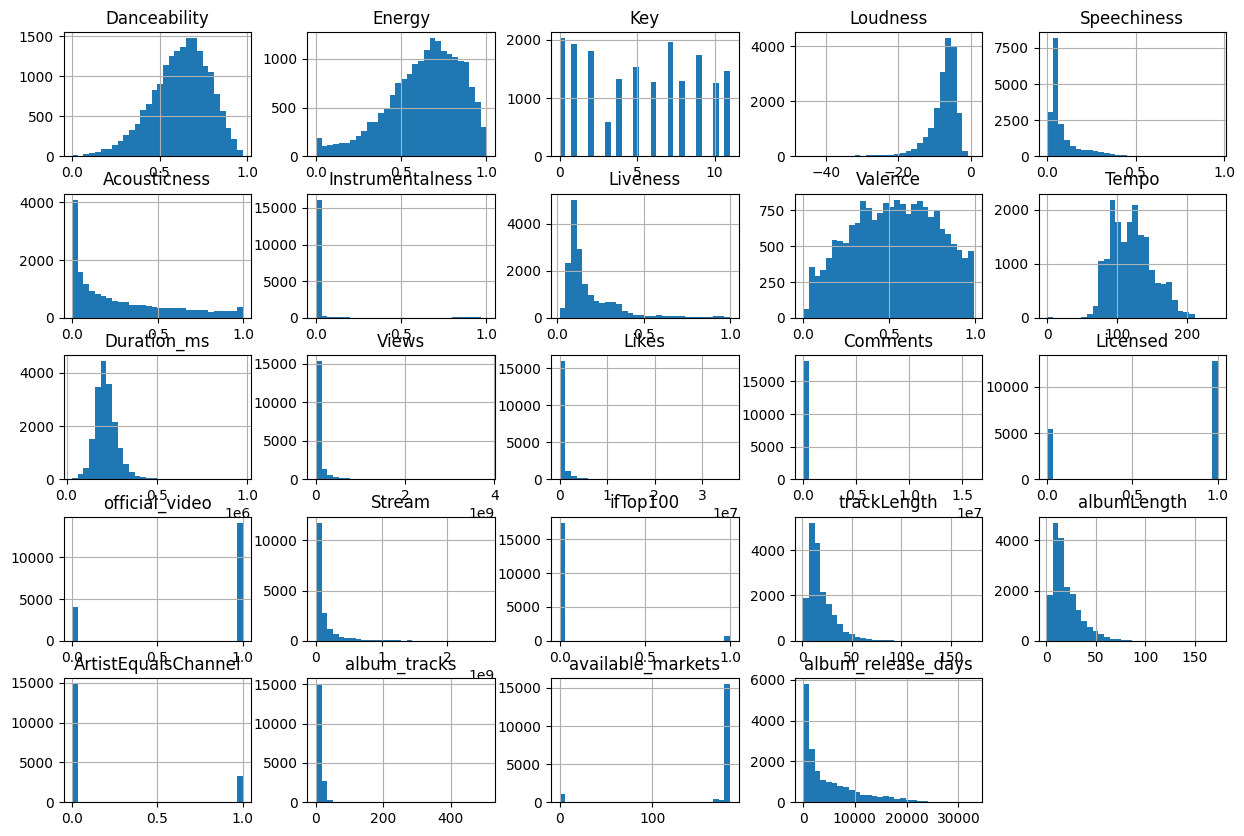

In [41]:
df.hist(bins=30, figsize=(15, 10))

### Feature encoding


In [42]:
# one hot encoding for Album_type
encoded = pd.get_dummies(df['Album_type'], prefix='Album_type')
df = pd.concat([df, encoded], axis=1)
df = df.drop("Album_type", axis=1)

In [43]:
df.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream,ifTop100,trackLength,albumLength,ArtistEqualsChannel,album_tracks,available_markets,album_release_days,Album_type_album,Album_type_compilation,Album_type_single
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,1.0,1.0,1.040235e+09,0,14,10,1,15,168,6522,1,0,0
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,1.0,1.0,3.100837e+08,0,15,13,1,16,184,4777,1,0,0
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,1.0,1.0,6.306347e+07,0,45,45,1,1,180,213,0,0,1
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,1.0,1.0,4.346636e+08,0,18,13,1,16,184,4777,1,0,0
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,1.0,1.0,6.172597e+08,0,14,8,1,18,2,8125,1,0,0


In [44]:
df.to_csv("df_addedNewFeatures.csv", encoding='utf-8', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6bca811-fc7a-456b-b8f3-4c66c733d95a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>